In [46]:
import pickle
import matplotlib.pyplot as plt

# Using simple tokenizer

In [2]:
with open('raw_sentences.pickle', 'rb') as file:
    all_sentences = pickle.load(file)


In [3]:
len(all_sentences)

99766

```Total number of sentences: 99766```

In [4]:
single_sequence = [word for sent in all_sentences for word in sent]
len(single_sequence)

858434

In [5]:
unique_words = list(set(single_sequence))
len(unique_words)

230891

#### Raw Dataset (Simple Tokenizer)
```
Total number of words: 858434
Total number of unique words: 230891
Percentage of unique words among all words: 26.9%
```

Lesser percentage = more repition

### Annotated Dataset

In [6]:
with open(r'..\AnnotatedDatasetParsing\full_dataset_131.pickle', 'rb') as file:
    obj = pickle.load(file)

ad_sentences = []
for sentence in obj:
    temp = []
    for chunk in sentence.list_of_chunks:
        for word in chunk.list_of_words:
            temp.append(word.kannada_word)
    ad_sentences.append(temp)

len(ad_sentences)

6318

In [7]:
single_sequence_annotated = [word for sent in ad_sentences for word in sent]
len(single_sequence_annotated)

103475

In [8]:
unique_annotated_words = list(set(single_sequence_annotated))
len(unique_annotated_words)

14690

#### Annotated Dataset
```
Total number of words: 103475
Total number of unique words: 14690
Percentage of unique words among all words: 14.2%
```

### Number of similar words between annotated dataset and raw dataset

In [9]:
len(list(set(unique_annotated_words) - set(unique_words)))

8210

In [10]:
len(list(set(unique_words) & set(unique_annotated_words)))

6480

# Using special character tokenizer

In [11]:
with open('delimited_sentences.pickle', 'rb') as file:
    delimited_sentences = pickle.load(file)
len(delimited_sentences)

99766

In [12]:
delimited_single_sequence = [word for sent in delimited_sentences for word in sent]
len(delimited_single_sequence)

1082609

In [13]:
delimited_unique_words = list(set(delimited_single_sequence))
len(delimited_unique_words)

186852

#### Raw Dataset (Special Symbol Tokenizer)
```
(Total) Extra words obtained by delimiting special characters also:  858434 --> 1082609
Unique words obtained by delimiting special characters also: 230891 --> 186852
```

In [14]:
len(list(set(delimited_unique_words) & set(unique_annotated_words)))

6914

In [15]:
from collections import Counter
from pprint import pprint

word_frequency = Counter(delimited_single_sequence)

top_words = word_frequency.most_common(30)
pprint(top_words)

[('.', 98070),
 (',', 43269),
 ('?', 10246),
 ('“', 9779),
 ('”', 9357),
 ('\u200c', 8811),
 ('"', 6246),
 ('ಈ', 6201),
 ('’', 5600),
 ('ಎಂದು', 5564),
 ('‘', 5491),
 ('ಆ', 5442),
 ('!', 5030),
 ('-', 4854),
 ('ಒಂದು', 4641),
 ('ತನ್ನ', 3765),
 ('ಮೇಲೆ', 3583),
 ('ಮತ್ತು', 3566),
 ('ನನ್ನ', 3131),
 ('ನಾನು', 3075),
 ('ಆದರೆ', 2628),
 ('ಅವರ', 2550),
 ('ಅಂತ', 2414),
 ('ಅವನ', 2404),
 ('ಅವರು', 2384),
 ('…', 2212),
 ('ಅದು', 1945),
 ('ತಮ್ಮ', 1941),
 ('ಇಲ್ಲ', 1813),
 ('ಹೋಗಿ', 1773)]


# Comparing with fastText unique words

In [17]:
fastText_words = []

with open('../Embeddings/all_words.txt', 'r', encoding='utf-8') as f:
    for line in f:
        line = line.strip()
        
        fastText_words.append(line)
len(fastText_words)

1600000

In [22]:
fastText_words[:10]

['.', ',', '</s>', "'", '-', 'ಮತ್ತು', ')', '(', '}', ':']

In [25]:
fastText_raw_common = list(set(delimited_unique_words) & set(fastText_words))
len(fastText_raw_common)

91590

```
Size of fastText Embeddings: 1600000
Size of unique words in raw dataset: 186852

Common available embeddings among the two: 91_590.  (49.02% of total tokens)
Need embeddings for: 95262 tokens

91_590 out of 1_86_852 have embeddings in fastText. 
```

```
What to do about the remaining unknown embeddings?
    1. Train new set of embeddings
    2. Stemming  (Prefix matching)
            Need to check for stemming and stuff (but getting correct word embeddings from the stem requires the word's POS tag)
```

```
FIND OUT
    1. has fastText stemmed?
    2. Get more data
    3. 
```

In [26]:
fastText_raw_common[:10]

['ಕೋಚು',
 'ಉತ್ತರಕ್ರಿಯೆಯ',
 'ಪ್ರಖ್ಯಾತ',
 'ವೇಷಧಾರಿಗಳು',
 'ರುಚಿಯಾಗಿತ್ತು',
 'ಲೇಖಕರೂ',
 'ಮಟ್ಟಕ್ಕೂ',
 'ಹೆಗಡೆ',
 'ಪ್ರಬುದ್ಧತೆಯನ್ನು',
 'ಭಾವಿಸುತ್ತಿದ್ದ']

In [27]:
oov = list(set(delimited_unique_words) - set(fastText_raw_common))
len(oov)

95262

In [28]:
oov[:10]

['ಅಳ್ತಿಯ',
 'ನಮ್ಮಂಥವ್ರಿಗೆ',
 'ಮಾರ್ಗರೀಟಾಳನ್ನ',
 'ಹೆರಗೋಗಿ',
 'ಆಕಾಂಕ್ಷೆಯು',
 'ಘೋರಾರಣ್ಯದ',
 'ಗಪೂರ',
 'ಮನುಷ್ಯನಾಗಲೂಬಹುದು',
 'ತಲ್ದಿಂಬಿಗೆ',
 'ಕ್ಷಮಿಸುವರೆಂದು']

#### What is the frequency distribution of words for which embeddings are unknown? (In the raw data)

In [ ]:
delimited_single_sequence and oov COUNTER

In [32]:
oov_word_counts = {}

for word in oov:
    count = delimited_single_sequence.count(word)
    oov_word_counts[word] = count

len(oov_word_counts)

KeyboardInterrupt: 

In [33]:
word_counts = Counter(delimited_single_sequence)
len(word_counts)

186852

In [34]:
oov_word_counts = {word: word_counts[word] for word in oov}
len(oov_word_counts)

95262

In [43]:
sorted_list = sorted(oov_word_counts.items(), key=lambda x: x[1], reverse=True)
len(sorted_list)

95262

In [44]:
sorted_list[0]

('ವಂದ್', 752)

In [48]:
oov_words, oov_counts = zip(*sorted_list)
len(oov_words), len(oov_counts)

(95262, 95262)

In [49]:
oov_counts[:5]

(752, 538, 291, 224, 139)

Text(0.5, 1.0, 'Frequency Distribution')

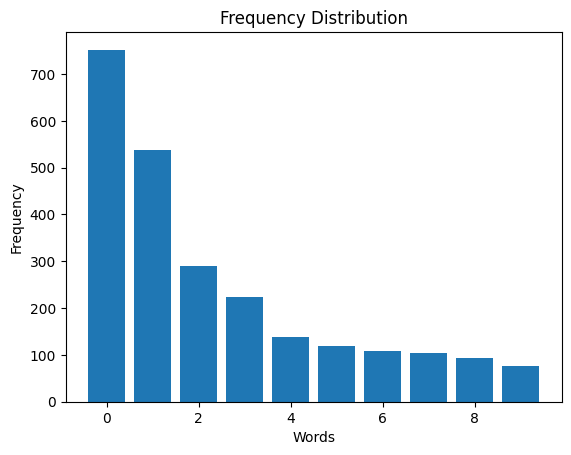

In [57]:
plt.bar(range(10), oov_counts[:10])
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Frequency Distribution')

Text(0.5, 1.0, 'Frequency Distribution')

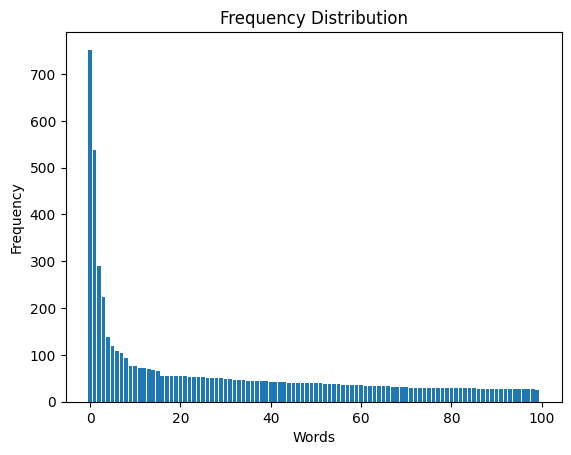

In [58]:
plt.bar(range(100), oov_counts[:100])
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Frequency Distribution')

In [64]:
oov_counts.count(1), len(oov_counts)

(81350, 95262)

```
    81350 out of 95262 words for which embeddings is not known, appears **ONLY ONCE**.
    81350 + 8695 out of 95262 words for which embeddings is not known, appears **ONLY ONCE**.
```

In [65]:
95262 - 81350

13912

Text(0.5, 1.0, 'Frequency Distribution')

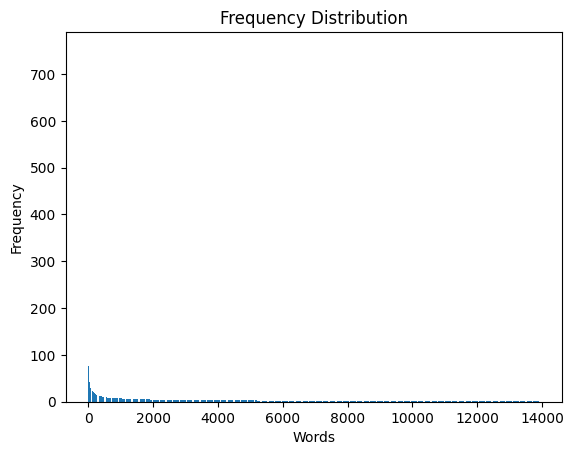

In [66]:
plt.bar(range(13912), oov_counts[:13912])
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Frequency Distribution')

In [71]:
more_than_once = zip(oov_words[:13912], oov_counts[:13912])

In [72]:
more_than_once_words, more_than_once_counts = zip(*more_than_once)
len(more_than_once_words), len(more_than_once_counts)

(13912, 13912)

In [73]:
import statistics

mean = statistics.mean(more_than_once_counts)
median = statistics.median(more_than_once_counts)
mode = statistics.mode(more_than_once_counts)
stdev = statistics.stdev(more_than_once_counts)
variance = statistics.variance(more_than_once_counts)

print("Mean:", mean)
print("Median:", median)
print("Mode:", mode)
print("Standard Deviation:", stdev)
print("Variance:", variance)

Mean: 3.5613858539390453
Median: 2.0
Mode: 2
Standard Deviation: 9.571299532729013
Variance: 91.6097747452186


In [86]:
cumulative = []
cumulative_sum = 0
for i in range(1, 11):
    cumulative_sum += oov_counts.count(i)
    cumulative.append(cumulative_sum/len(oov_counts))
    print(i, oov_counts.count(i), f"Cumulative sum: {cumulative_sum}")
    print(f"Percentage till here: {cumulative_sum/len(oov_counts)}", '\n')

1 81350 Cumulative sum: 81350
Percentage till here: 0.8539606558753753 

2 8695 Cumulative sum: 90045
Percentage till here: 0.9452352459532657 

3 2285 Cumulative sum: 92330
Percentage till here: 0.969221725346938 

4 1028 Cumulative sum: 93358
Percentage till here: 0.9800130167328001 

5 546 Cumulative sum: 93904
Percentage till here: 0.9857445781108942 

6 311 Cumulative sum: 94215
Percentage till here: 0.9890092586760723 

7 197 Cumulative sum: 94412
Percentage till here: 0.9910772396128572 

8 160 Cumulative sum: 94572
Percentage till here: 0.9927568180386723 

9 109 Cumulative sum: 94681
Percentage till here: 0.9939010308412588 

10 93 Cumulative sum: 94774
Percentage till here: 0.9948772858012639 



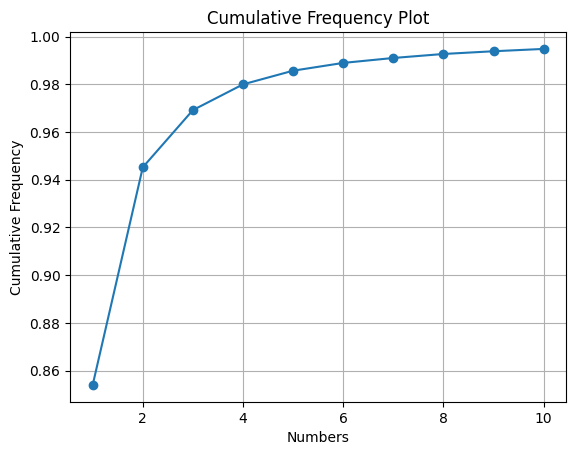

In [87]:
plt.plot(range(1, 11), cumulative, marker='o')
plt.xlabel('Numbers')
plt.ylabel('Cumulative Frequency')
plt.title('Cumulative Frequency Plot')
plt.grid(True)
plt.show()
